# La importancia de no sobreestimar los grados de libertad

## Introducción

Queremos ilustar cómo los **grados de libertad espurios** pueden inflar artificialmente la significancia de un ajuste. 

Vamos a crear una serie sintética de baja frecuencia con *información climática*. A partir de ésta, vamos a crear otra que no contiene más información, sino sólo ruido de alta frecuencia que simulará la *variabilidad interanual*. Veremos cómo la tendiencia es aparentemente más robusta en la serie con más frecuencia, pese a que sabemos que no contiene más *información climática*. 

Esto ilustrará un artefacto de los ajustes, que ocurren cuando sobreestimamos los *grados de libertad* de los datos.

## Procedimiento
Los pasos del experimentos son:
 1. Creamos una serie sintética "anual" con una pequeña tendencia, $a$, y la contaminamos con algo de ruido (para que el ajuste no salga perfecto): $y_1=ax+b+\epsilon$
 1. A partir de la anterior, creamos una serie "mensual" interpolando linealmente entre los valores anuales y sumando ruido aleatorio que simule la variabilidad meteorológica $y_2=y_1+\epsilon$
 1. Ajustamos la recta, y comparamos los p-valores de las dos series
 1. repetimos el experimento 1000 veces y mostramos el histograma de los p-valores


%%latex

In [28]:
# Usamos numpy y scipy para los ajustes
import numpy as np
from scipy import stats

# El número de experimentos y los arrays donde se guarda el resultado en cada uno de ellos
Nexp = 1000
p_y = np.zeros(Nexp) # para guardar p-valor de la serie anual
p_m = np.zeros(Nexp) # para guardar p-valor de la serie mensual

x_y = np.linspace(0,100,10)  # eje de tiempo de 0 a 100, escala anual
x_m = np.linspace(0,100,100) # eje de tiempo de 0 a 100, escala mensual

# Función que genera la serie de "información climática" con una suave pendiente y algo de ruido
def f(x):
    # Y = ax + b
    a = 0.01
    return a * x +  5*(np.random.rand(x.size)-0.5)

# Bucle en el número de experimentos
for i in range (Nexp):
    y_y = f(x_y) # generamos una serie climática con ligera tendencia
    y_m = np.interp(x_m,x_y,y_y) + 5*(np.random.rand(x_m.size)-0.5) # generamos serie interanual

    # Ajustamos ambas series y guardamos el p-valor de cada experimento
    test_y = stats.linregress(x_y,y_y) 
    test_m = stats.linregress(x_m,y_m)
    p_y[i]=test_y.pvalue
    p_m[i]=test_m.pvalue

## Resultados y discusión
Para ver cuál es el efecto de la longitud de la serie cuando no se le añade más información real, vamos a representar los histogramas de los p-valores de cada una de las dos series tras los 1000 experimentos. Además mostramos abajo, de manera ilustrativa para entender mejor el experimento propuesto, una sola de las parejas de series usadas (de las 1000 usados para producir los histogramas). Haremos uso de la librería **matplotlib**.


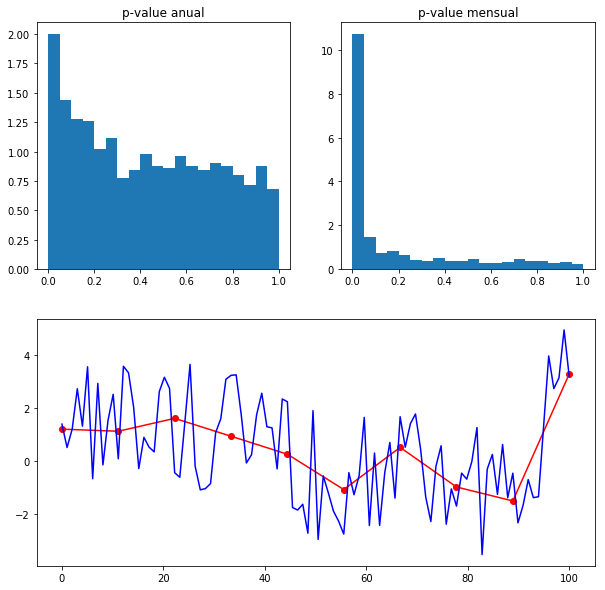

In [29]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

gs = gridspec.GridSpec(2, 2)
plt.figure(figsize=(10,10))
ax = plt.subplot(gs[0, 0])
plt.hist(p_y, bins=20, density=True)
plt.title("p-value anual")

ax = plt.subplot(gs[0, 1])
plt.hist(p_m, bins=20, density=True)
plt.title("p-value mensual")

ax = plt.subplot(gs[1, :])
plt.plot(x_y,y_y, 'o-', c='r')
plt.plot(x_m,y_m, color='b')

plt.show()


Se ve que aunque la información subyacente es la misma en cada experimento, los p-valores son significativamente más altos al trabajar con series interanuales. Esto es debido a que el número de puntos es mucho mayor, con lo que el valor que se requiere para que la tendencia sea significativamente distinta de cero es mucho menor. En realidad lo que está pasando es que estamos "engañando al test" al hacerle creer que nuestros datos tienen más grados de libertad de los que tiene realmente. Habría que buscar un test que sea más robusto, o como se hace de manera más habitual, trabajar con medias anuales, lo cual reduce en un factor 12 el número de grados de libertad.